In [171]:
import os
import sys
# Add src/ to sys.path (relative to current notebook)
sys.path.append(os.path.abspath("../../src"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

from utils.DataAnalysis import TableAnalysis, MyCustomException
from utils.VariableAnalysis import UnivariateAnalysis,BivariateAnalysis
from utils.pdf_file_save import PDFReportWriter

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Helper Functions

In [172]:
os.getcwd()

'd:\\Capstone Project\\House_Pricing\\notebook\\data_wrangling'

In [173]:
file_path = pathlib.Path('D:\Capstone Project\dataset\House_Price_dataset')

In [174]:
df = pd.read_csv(f"{file_path}/5.gurgaon_properties_cleaned_v2.csv")
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,m3m woodshire,sector 107,0.80,5856.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,7.0,North-East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,1,165
1,flat,not applicable,sector 4,0.42,5600.0,750.0,Carpet area: 750 (69.68 sq.m.),2,2,1,3.0,NaN,Relatively New,NaN,NaN,750.0,0,0,0,0,0,1,26
2,house,independent,sector 105,0.60,11102.0,540.0,Plot area 60(50.17 sq.m.),8,4,3,3.0,West,New Property,NaN,540.0,NaN,0,0,0,0,0,0,17
3,flat,kashish manor one,sector 111,1.65,7097.0,2325.0,Super Built up area 2325(216 sq.m.),3,4,3+,14.0,NaN,Under Construction,2325.0,NaN,NaN,0,1,0,0,1,0,8
4,house,independent,sector 3,0.90,10000.0,900.0,Plot area 900(83.61 sq.m.)Built Up area: 3500 ...,3,4,3,3.0,NaN,Moderately Old,NaN,3500.0,NaN,0,0,0,0,1,1,42


In [175]:
df.shape

(3803, 23)

In [176]:
## Parent Class Test
da_analysis = TableAnalysis(df)
print(da_analysis)

Rows: 3803
Columns: 23
Duplicates: 126
For Duplicate Records: ShowDuplicates()


In [177]:
df.drop_duplicates(inplace=True)

In [178]:
## Parent Class Test
da_analysis = TableAnalysis(df)
print(da_analysis)

Rows: 3677
Columns: 23


In [179]:
da_analysis.CategoricalFeatureSummary()

,field,non_null_count,null_count,null%,dtype,unique_count,top_value,top_count,top_pct,top_3,top_3_pct,rare(<1%)_count,singleton_count,entropy,dominance_ratio,is_binary,high_cardinality
0,property_type,3677,0,0.0000,object,2,flat,2818,76.64,"[flat, house]","[76.64, 23.36]",0,0,0.5436,0.7664,True,False
1,society,3676,1,0.0272,object,677,independent,486,13.22,"[independent, tulip violet, ss the leaf]","[13.22, 2.04, 1.99]",672,309,5.4376,0.1322,False,True
2,sector,3677,0,0.0000,object,115,sohna road,153,4.16,"[sohna road, sector 85, sector 102]","[4.16, 2.91, 2.88]",74,1,4.3893,0.0416,False,True
3,areaWithType,3677,0,0.0000,object,2355,Plot area 360(301.01 sq.m.),37,1.01,"[Plot area 360(301.01 sq.m.), Plot area 300(25...","[1.01, 0.71, 0.52]",2354,1849,7.4545,0.0101,False,True
4,balcony,3677,0,0.0000,object,5,3+,1172,31.87,"[3+, 3, 2]","[31.87, 29.21, 24.04]",0,0,1.4447,0.3187,False,False
5,facing,2632,1045,28.4199,object,9,NaN,1045,28.42,"[nan, North-East, East]","[28.42, 16.94, 16.94]",0,0,1.9831,0.2842,False,False
6,agePossession,3677,0,0.0000,object,6,Relatively New,1646,44.76,"[Relatively New, New Property, Moderately Old]","[44.76, 16.13, 15.31]",0,0,1.5440,0.4476,False,False


In [180]:
da_analysis.NumericalFeatureSummary()

,field,non_null_count,null_count,null%,dtype,min,max,mean,median,std,var (M),1 %,5 %,25 %,50 %,75 %,95 %,99 %,IQR,lower_bound,upper_bound,outliers_count,outlier_percentage,skewness,kurtosis,distribution_summary
0,price,3660,17,0.4623,float64,0.07,31.5,2.53,1.52,2.98,0.00,0.25,0.37,0.95,1.52,2.75,8.5,15.26,1.80,-1.750,5.450,425,11.61,3.28,14.93,"Highly Skewed (Positive: tail on the right), V..."
1,price_per_sqft,3660,17,0.4623,float64,4.00,600000.0,13892.67,9020.00,23210.07,538.71,3299.16,4715.95,6817.25,9020.00,13880.50,33333.0,85052.47,7063.25,-3777.625,24475.375,354,9.67,11.44,186.93,"Highly Skewed (Positive: tail on the right), V..."
2,area,3660,17,0.4623,float64,50.00,875000.0,2888.33,1733.00,23167.51,536.73,250.00,518.85,1232.25,1733.00,2300.00,4246.2,8068.80,1067.75,-369.375,3901.625,216,5.90,29.73,942.03,"Highly Skewed (Positive: tail on the right), V..."
3,bedRoom,3677,0,0.0000,int64,1.00,21.0,3.36,3.00,1.90,0.00,1.00,2.00,2.00,3.00,4.00,6.0,12.00,2.00,-1.000,7.000,143,3.89,3.49,18.21,"Highly Skewed (Positive: tail on the right), V..."
4,bathroom,3677,0,0.0000,int64,1.00,21.0,3.42,3.00,1.95,0.00,1.00,2.00,2.00,3.00,4.00,6.0,12.00,2.00,-1.000,7.000,126,3.43,3.25,17.54,"Highly Skewed (Positive: tail on the right), V..."
5,floorNum,3658,19,0.5167,float64,0.00,51.0,6.80,5.00,6.01,0.00,0.00,1.00,2.00,5.00,10.00,18.0,27.00,8.00,-10.000,22.000,81,2.21,1.69,4.52,"Highly Skewed (Positive: tail on the right), L..."
6,super_built_up_area,1875,1802,49.0073,float64,89.00,10000.0,1925.24,1828.00,764.17,0.58,520.36,767.00,1479.50,1828.00,2215.00,3185.0,4636.68,735.50,376.250,3318.250,89,4.75,1.84,10.35,"Highly Skewed (Positive: tail on the right), V..."
7,built_up_area,1690,1987,54.0386,float64,2.00,737147.0,2379.59,1650.00,17942.88,321.95,61.89,240.45,1100.00,1650.00,2400.00,4691.0,7455.50,1300.00,-850.000,4350.000,127,7.51,40.71,1667.87,"Highly Skewed (Positive: tail on the right), V..."
8,carpet_area,1872,1805,49.0889,float64,15.00,607936.0,2529.18,1300.00,22799.84,519.83,92.31,350.00,843.00,1300.00,1790.00,2950.0,6859.50,947.00,-577.500,3210.500,78,4.17,24.33,604.54,"Highly Skewed (Positive: tail on the right), V..."
9,study room,3677,0,0.0000,int64,0.00,1.0,0.19,0.00,0.39,0.00,0.00,0.00,0.00,0.00,0.00,1.0,1.00,0.00,0.000,0.000,705,19.17,1.57,0.46,"Highly Skewed (Positive: tail on the right), M..."


In [181]:
da_analysis.get_outliers_for_column(column='price').sort_values('price',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3106,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.00,NaN,1,1,1,1,0,2,74
2584,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.00,NaN,1,1,0,1,1,1,42
2629,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.00,350.0,1,1,1,1,0,1,72
1006,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.00,NaN,1,1,0,1,1,1,138
1271,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.00,NaN,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,flat,mahindra luminare,sector 59,5.50,18181.0,3025.0,Super Built up area 3025(281.03 sq.m.),3,3,1,26.0,NaN,Under Construction,3025.0,NaN,NaN,0,1,0,0,0,0,24
1057,house,housing board colony,sector 28,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4,3,3,2.0,North,Old Property,NaN,1800.00,NaN,0,0,0,1,1,1,22
1173,house,vipul tatvam villa,sector 48,5.50,21219.0,2592.0,Plot area 288(240.8 sq.m.),3,6,2,2.0,North,Moderately Old,NaN,2592.00,NaN,0,1,0,0,1,1,106
894,flat,experion windchants,sector 112,5.49,11584.0,4739.0,Super Built up area 4739(440.27 sq.m.)Built Up...,4,5,3+,5.0,South,Relatively New,4739.0,3655.35,NaN,0,1,0,0,0,1,168


# --------------- 1. Univariate Analysis Categorical Column ------------------

In [182]:
## Class Instantiation 
df_uni = UnivariateAnalysis(df) 
column_type = df_uni.ColumnVariable()

dict_keys(['categorical_columns', 'numerical_columns'])


In [183]:
categorical_columns = column_type.get('categorical_columns')
numerical_columns = column_type.get('numerical_columns')

#### Property Type Column Deep Analysis

In [184]:
categorical_columns

['property_type',
 'society',
 'sector',
 'areaWithType',
 'balcony',
 'facing',
 'agePossession']

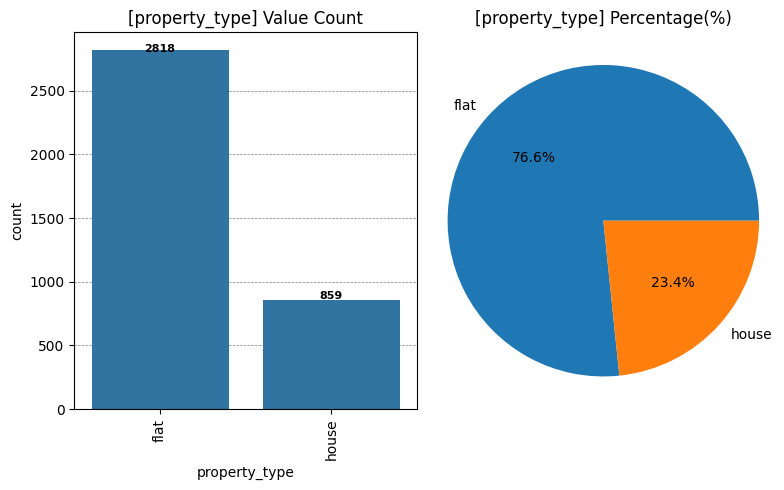

In [185]:
# ### Categorical Column Analysis
# for each in categorical_columns:
#     df_uni.CategoricalFeaturesAnalysis(each)

property_type_observation = df_uni.CategoricalFeaturesAnalysis('property_type')


In [186]:
property_type_observation

,field,property_type
0,non_null_count,3677
1,null_count,0
2,null%,0.0
3,dtype,object
4,unique_count,2
5,top_value,flat
6,top_count,2818
7,top_pct,76.64
8,top_3,"[flat, house]"
9,top_3_pct,"[76.64, 23.36]"


#### Society Column Deep Analysis

[society] Has Higher Unique Values, Picked Top Higher Frequency Value


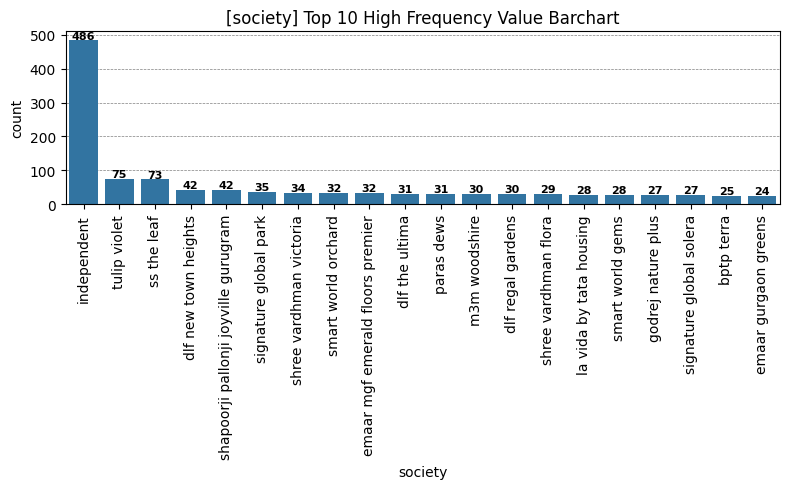

In [187]:
# #### Categorical Column Analysis
# for each in ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']:
#     df_uni.CategoricalFeaturesAnalysis(each)


df_uni = UnivariateAnalysis(df) 
society_observation = df_uni.CategoricalFeaturesAnalysis('society')

In [188]:
society_observation

,field,society
0,non_null_count,3676
1,null_count,1
2,null%,0.0272
3,dtype,object
4,unique_count,677
5,top_value,independent
6,top_count,486
7,top_pct,13.22
8,top_3,"[independent, tulip violet, ss the leaf]"
9,top_3_pct,"[13.22, 2.04, 1.99]"


In [189]:
df['society'].isnull().sum()
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3219,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,NaN,NaN,Under Construction,NaN,1625.0,NaN,0,0,0,0,0,0,0


#### Sector Column Deep Analysis

[sector] Has Higher Unique Values, Picked Top Higher Frequency Value


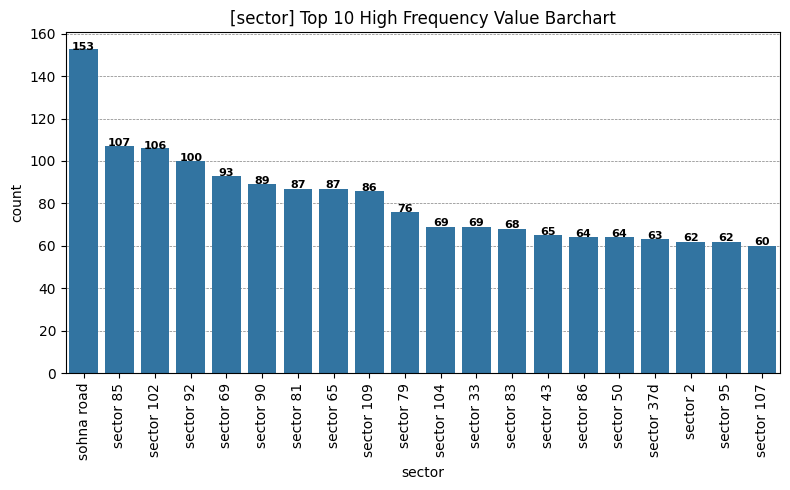

In [190]:
# #### Categorical Column Analysis
# for each in ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']:
#     df_uni.CategoricalFeaturesAnalysis(each)

df_uni = UnivariateAnalysis(df) 
sector_observation = df_uni.CategoricalFeaturesAnalysis('sector')

In [191]:
sector_observation

,field,sector
0,non_null_count,3677
1,null_count,0
2,null%,0.0
3,dtype,object
4,unique_count,115
5,top_value,sohna road
6,top_count,153
7,top_pct,4.16
8,top_3,"[sohna road, sector 85, sector 102]"
9,top_3_pct,"[4.16, 2.91, 2.88]"


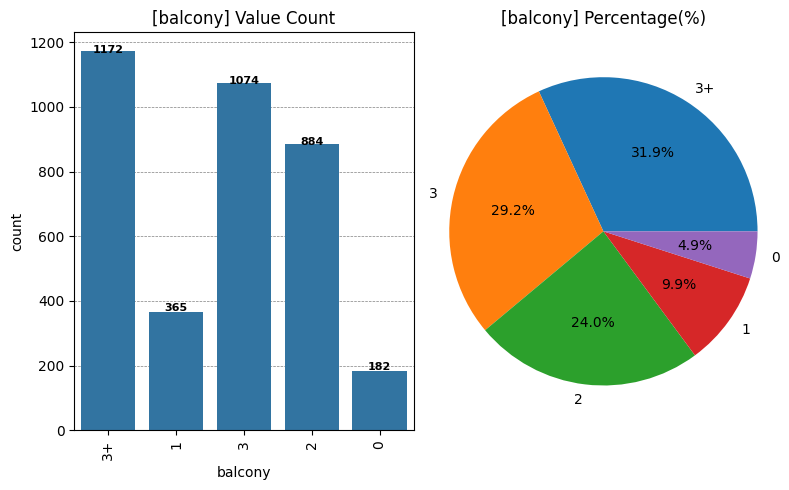

In [192]:
# #### Categorical Column Analysis
# for each in ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']:
#     df_uni.CategoricalFeaturesAnalysis(each)

df_uni = UnivariateAnalysis(df) 
balcony_observation = df_uni.CategoricalFeaturesAnalysis('balcony')

# ---------------2. Univariate Analysis Numerical Column -------------------

In [193]:
numerical_columns

['price',
 'price_per_sqft',
 'area',
 'bedRoom',
 'bathroom',
 'floorNum',
 'super_built_up_area',
 'built_up_area',
 'carpet_area',
 'study room',
 'servant room',
 'store room',
 'pooja room',
 'others',
 'furnishing_type',
 'luxury_score']

In [194]:
# for each in numerical_columns:
#     df_uni.NumericalFeatureAnalysis(each)

#### [Price] Column Deep Analysis 

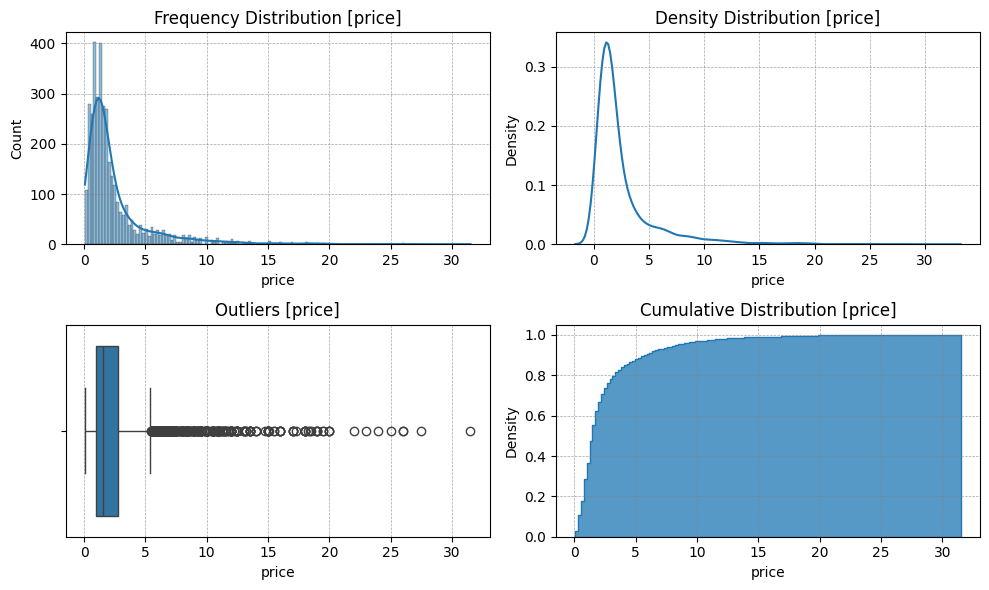

In [195]:
## Initial Data Visaulization Of Area

df_uni = UnivariateAnalysis(df) 
price_observation, price_outlier_df = df_uni.NumericalFeatureAnalysis('price')

In [196]:
price_observation

,field,price
0,non_null_count,3660
1,null_count,17
2,null%,0.4623
3,dtype,float64
4,min,0.07
5,max,31.5
6,mean,2.53
7,median,1.52
8,std,2.98
9,var (M),0.0


In [197]:
price_outlier_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
11,flat,pioneer araya,sector 62,10.75,19500.0,5513.0,Super Built up area 5514(512.27 sq.m.),5,7,3,10.0,North-East,Relatively New,5514.0,NaN,NaN,0,1,0,0,0,1,153
12,house,independent,sector 38,8.00,230547.0,347.0,Built Up area: 347 (32.24 sq.m.)Carpet area: 2...,10,10,3+,1.0,North,Undefined,NaN,347.0,215.0,0,0,0,0,0,0,0
32,house,independent,sector 28,9.00,27778.0,3240.0,Plot area 360(301.01 sq.m.),6,7,3+,3.0,North,Moderately Old,NaN,3240.0,NaN,1,1,1,1,0,0,67
42,flat,tata primanti,sector 72,6.50,15294.0,4250.0,Super Built up area 4250(394.84 sq.m.),4,4,3+,0.0,East,Relatively New,4250.0,NaN,NaN,1,1,0,1,0,0,67
44,house,vipul tatvam villa,sector 48,7.69,24069.0,3195.0,Plot area 355(296.83 sq.m.),4,5,3,2.0,North-West,Moderately Old,NaN,3195.0,NaN,1,1,1,1,0,1,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726,house,independent,sector 41,11.00,33951.0,3240.0,Plot area 360(301.01 sq.m.),4,4,2,3.0,East,New Property,NaN,3240.0,NaN,1,1,0,1,0,0,35
3774,house,independent,sector 41,7.25,29293.0,2475.0,Plot area 275(229.94 sq.m.),9,8,3,4.0,South-West,Old Property,NaN,2475.0,NaN,0,1,0,0,0,1,94
3782,house,emaar mgf marbella,sector 66,8.70,38667.0,2250.0,Plot area 250(209.03 sq.m.)Built Up area: 267 ...,4,5,2,3.0,East,New Property,NaN,267.0,NaN,1,1,0,0,0,0,144
3785,house,unitech uniworld resorts,sector 33,11.50,24573.0,4680.0,Plot area 520(434.79 sq.m.),5,6,3+,4.0,East,Relatively New,NaN,4680.0,NaN,0,1,0,0,0,0,84


In [198]:
# price_outlier_df.to_csv('price_outlier_df.csv', index=False)

### Since Our Output Data is highly Skewed, Log Transformation Experiment for Normal distribution 


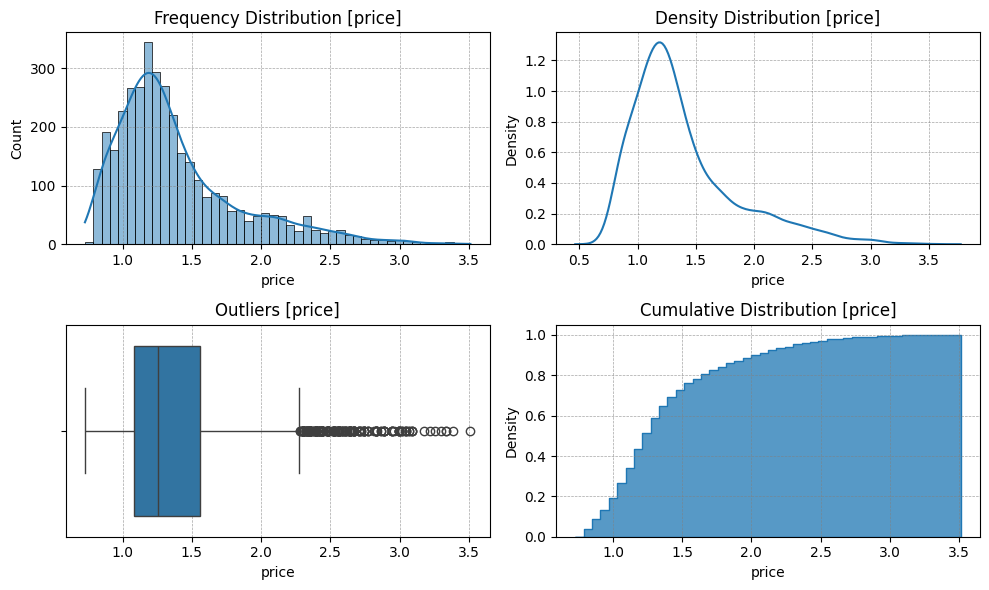

In [199]:
log_transfored_df = df.copy()
log_transfored_df['price'] = np.log1p(log_transfored_df['price'] + 1)
log_transfored_df =  UnivariateAnalysis(log_transfored_df)
log_transfored_Observation, log_transfored_outliers  = log_transfored_df.NumericalFeatureAnalysis('price')

In [200]:
# log_transfored_outliers

#### [price_per_sqft] Column Deep Analysis 

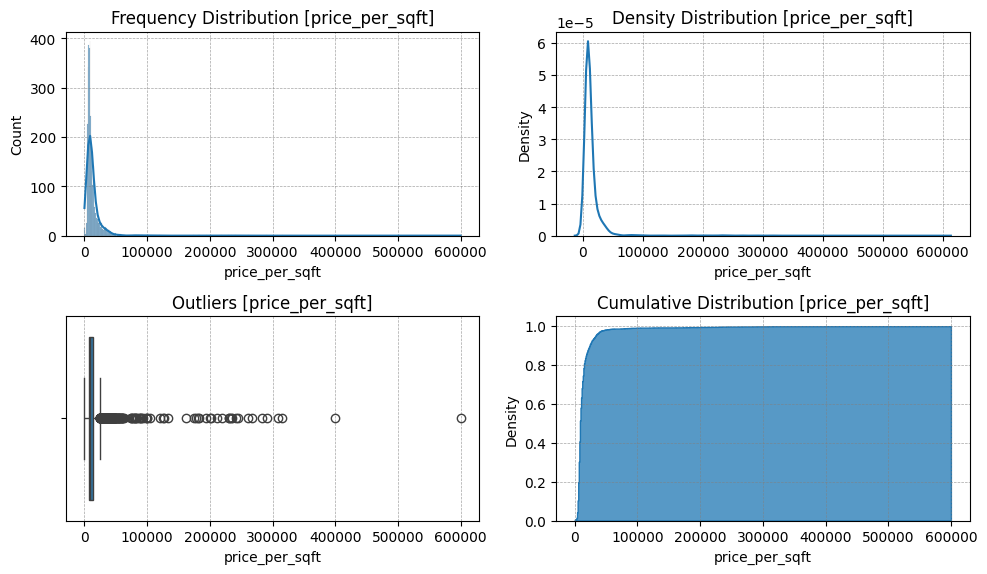

In [201]:
## Initial Data Visaulization

df_uni = UnivariateAnalysis(df) 
price_per_sqft_observation , price_per_sqft_outliers = df_uni.NumericalFeatureAnalysis('price_per_sqft')

In [202]:
price_per_sqft_observation

,field,price_per_sqft
0,non_null_count,3660
1,null_count,17
2,null%,0.4623
3,dtype,float64
4,min,4.0
5,max,600000.0
6,mean,13892.67
7,median,9020.0
8,std,23210.07
9,var (M),538.71


In [203]:
price_per_sqft_outliers['price_per_sqft'].describe()

count       354.000000
mean      52592.612994
std       61150.458507
min       24489.000000
25%       28208.250000
50%       33368.500000
75%       41982.250000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [204]:
price_per_sqft_outliers

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
12,house,independent,sector 38,8.00,230547.0,347.0,Built Up area: 347 (32.24 sq.m.)Carpet area: 2...,10,10,3+,1.0,North,Undefined,NaN,347.0,215.0,0,0,0,0,0,0,0
15,house,independent,sector 46,3.60,24845.0,1449.0,Plot area 161(134.62 sq.m.),5,5,3+,3.0,South-East,Moderately Old,NaN,1449.0,NaN,0,1,0,0,0,1,75
22,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9,9,3+,3.0,East,Relatively New,NaN,165.0,164.0,0,0,0,1,1,1,41
28,house,independent,sector 13,0.50,90909.0,55.0,Plot area 55(5.11 sq.m.),12,4,3,4.0,NaN,Old Property,NaN,55.0,NaN,0,0,0,0,0,0,15
32,house,independent,sector 28,9.00,27778.0,3240.0,Plot area 360(301.01 sq.m.),6,7,3+,3.0,North,Moderately Old,NaN,3240.0,NaN,1,1,1,1,0,0,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,house,independent,sector 41,7.25,29293.0,2475.0,Plot area 275(229.94 sq.m.),9,8,3,4.0,South-West,Old Property,NaN,2475.0,NaN,0,1,0,0,0,1,94
3782,house,emaar mgf marbella,sector 66,8.70,38667.0,2250.0,Plot area 250(209.03 sq.m.)Built Up area: 267 ...,4,5,2,3.0,East,New Property,NaN,267.0,NaN,1,1,0,0,0,0,144
3785,house,unitech uniworld resorts,sector 33,11.50,24573.0,4680.0,Plot area 520(434.79 sq.m.),5,6,3+,4.0,East,Relatively New,NaN,4680.0,NaN,0,1,0,0,0,0,84
3789,house,independent,sector 28,4.50,125000.0,360.0,Built Up area: 360 (33.45 sq.m.),4,4,0,4.0,NaN,Undefined,NaN,360.0,NaN,0,0,0,0,0,0,0


In [205]:
### In 'area' column data error, (area<1000) in square yards, (area>1000) in sq ft. 
## Logic Applied All the area < 1000 Multiplied By 9 (sq ft = sq yd × 9)
price_per_sqft_outliers['area'] = price_per_sqft_outliers['area'].apply(lambda x:x*9 if x<1000 else x)

## Recalulate price_per_sqft
price_per_sqft_outliers['price_per_sqft'] = round((price_per_sqft_outliers['price']*10000000)/price_per_sqft_outliers['area'])

price_per_sqft_outliers['price_per_sqft'].describe()


count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [206]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [207]:
## Update in Original Data Frame 
df.update(price_per_sqft_outliers)

In [208]:
df['price_per_sqft'].describe()

count     3660.000000
mean     11645.377049
std       8123.060188
min          4.000000
25%       6738.000000
50%       8928.000000
75%      13492.750000
max      82540.000000
Name: price_per_sqft, dtype: float64

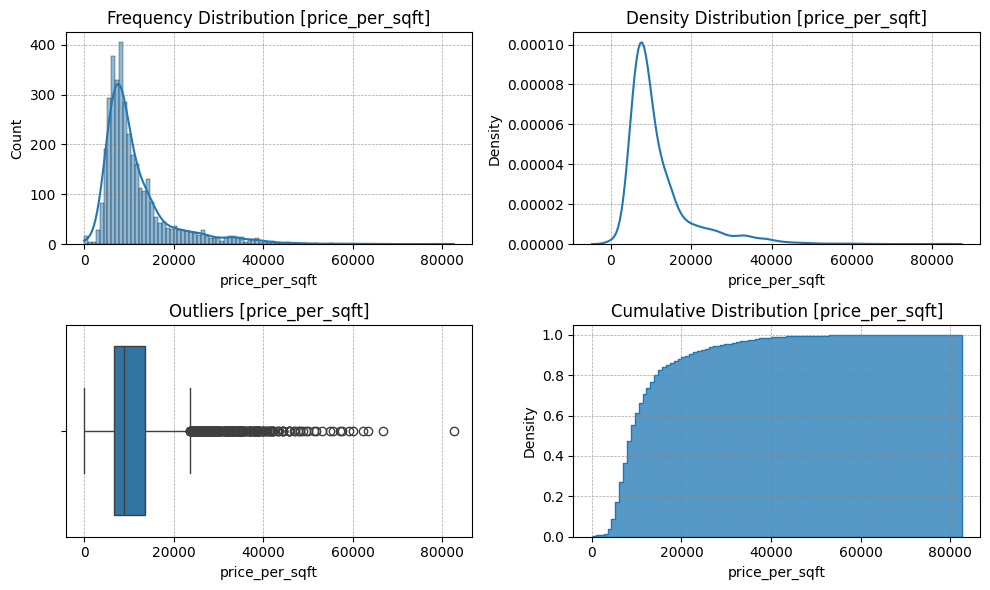

In [209]:
## After Recalculating area Price per square feet Logic

df_uni = UnivariateAnalysis(df)
a, b = df_uni.NumericalFeatureAnalysis(column='price_per_sqft')

In [210]:
df[df['price_per_sqft'] > 50000].shape

(13, 23)

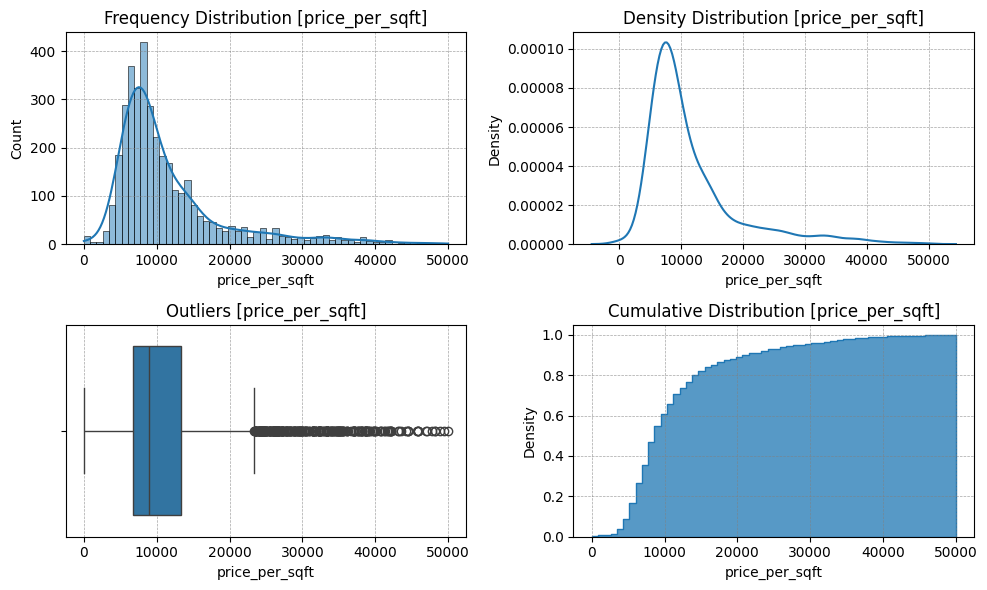

In [211]:
## Drop all the record where price_per_sqft> 50000
df= df[df['price_per_sqft'] <= 50000]

## After droping all the record where price_per_sqft> 50000
df_uni = UnivariateAnalysis(df)
a, b = df_uni.NumericalFeatureAnalysis(column='price_per_sqft')

#### [Area] Column Deep Analysis 

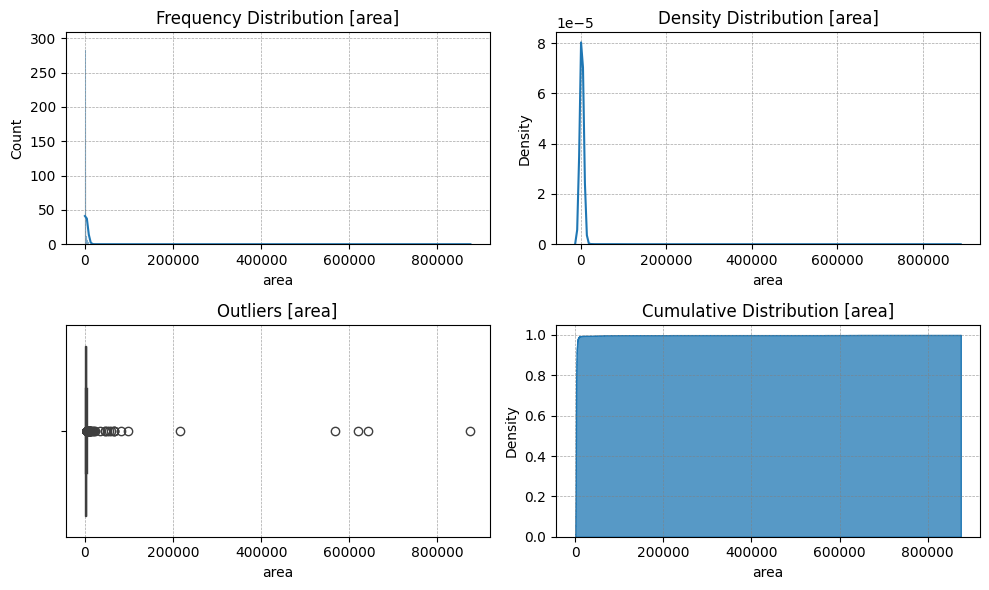

In [212]:
## Initial Data Visualization

df_uni = UnivariateAnalysis(df)
a,b = df_uni.NumericalFeatureAnalysis('area')

In [213]:
a

,field,area
0,non_null_count,3647
1,null_count,0
2,null%,0.0
3,dtype,float64
4,min,145.0
5,max,875000.0
6,mean,2947.72
7,median,1750.0
8,std,23208.19
9,var (M),538.62


In [214]:
## Verifying the count of the Outliers in area column.

df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1679,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44
3220,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65
3430,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,1,0
3508,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44
3526,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76


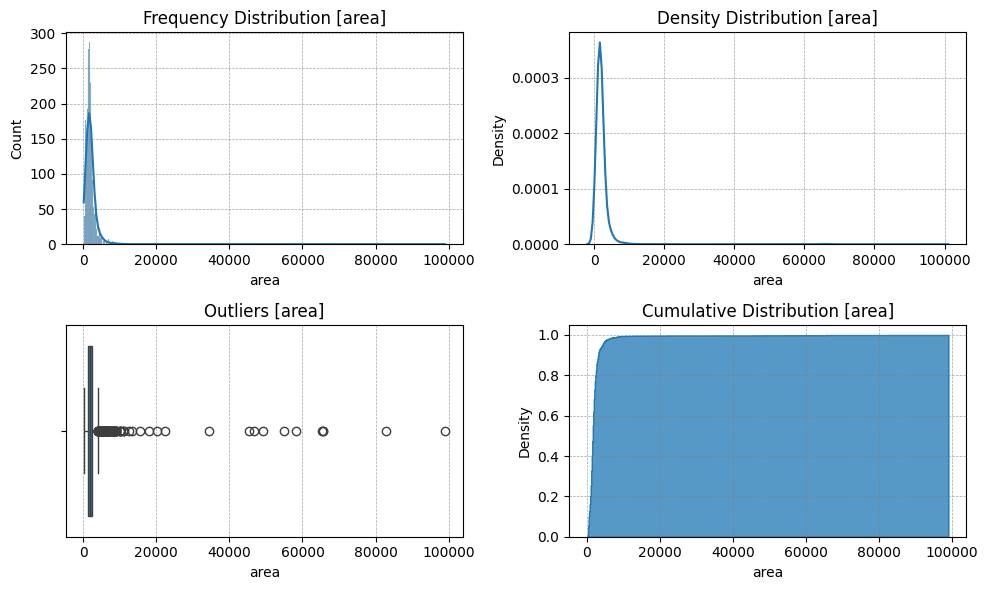

In [215]:
## Filtering All Records where Area < 100000
df = df[df['area'] < 100000]

df_uni = UnivariateAnalysis(df)
a,b = df_uni.NumericalFeatureAnalysis('area')

In [216]:
## Fetching record where area > 10000 10 thousand
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2010,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
2669,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
644,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
2318,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
293,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
1969,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
650,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
875,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
2622,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
2817,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [217]:
## Given Indexs has data Data Errors, decided to drop 

df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [218]:
## Exploring Data which area > 10000

df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2010,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
2669,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
644,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
2318,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
293,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
1969,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
650,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
875,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
2622,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
2817,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [219]:
## Updating areas based on the error
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

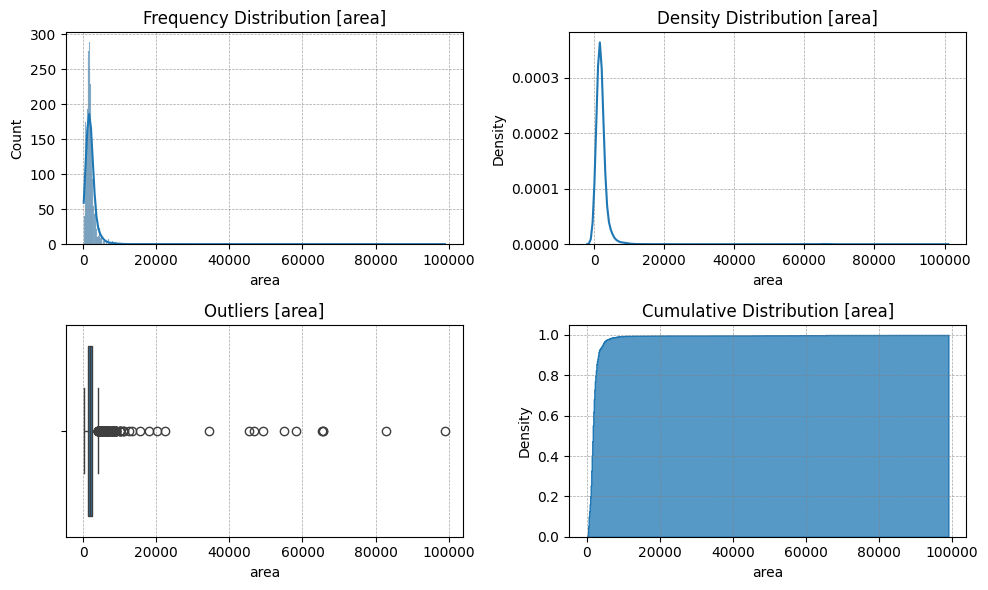

In [220]:
## After Removing records where error detected and after updating area calculation.
df_uni = UnivariateAnalysis(df)
a,b = df_uni.NumericalFeatureAnalysis('area')

### [bedRoom] Deep Analysis

Considered Descrete - Low Cardinality: bedRoom(int64)


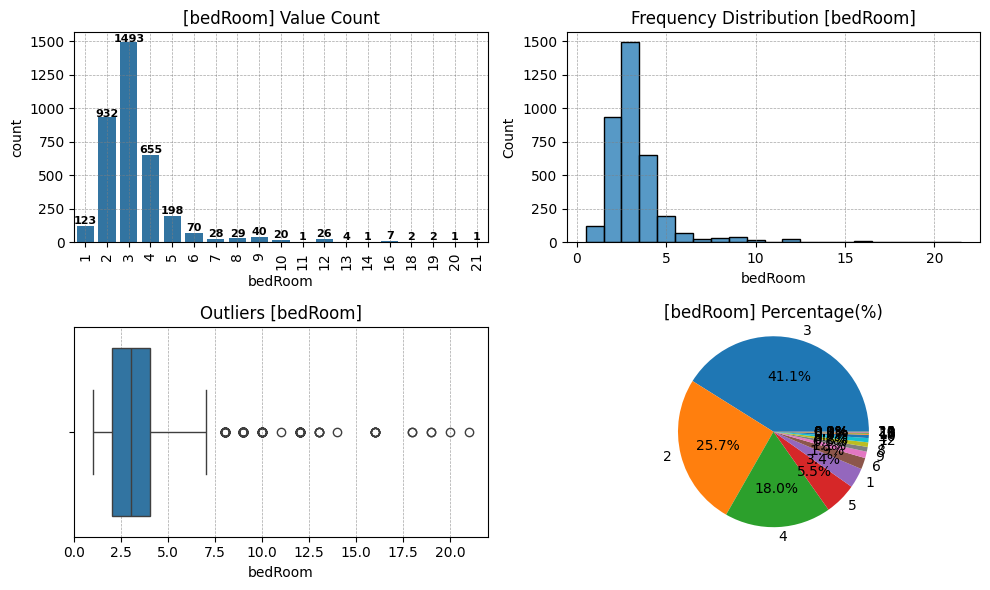

In [221]:
df_uni = UnivariateAnalysis(df)
bedRoom_observation, bedRoom_observation_outlier = df_uni.NumericalFeatureAnalysis('bedRoom')

In [222]:
bedRoom_observation

,field,bedRoom
0,non_null_count,3633
1,null_count,0
2,null%,0.0
3,dtype,int64
4,min,1.0
5,max,21.0
6,mean,3.33
7,median,3.0
8,std,1.83
9,var (M),0.0


In [223]:
bedRoom_observation_outlier

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
12,house,independent,sector 38,8.00,25616.0,3123.0,Built Up area: 347 (32.24 sq.m.)Carpet area: 2...,10,10,3+,1.0,North,Undefined,NaN,347.0,215.0,0,0,0,0,0,0,0
22,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9,9,3+,3.0,East,Relatively New,NaN,165.0,164.0,0,0,0,1,1,1,41
28,house,independent,sector 13,0.50,10101.0,495.0,Plot area 55(5.11 sq.m.),12,4,3,4.0,NaN,Old Property,NaN,55.0,NaN,0,0,0,0,0,0,15
72,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,2,49
73,house,sector 57 huda,sector 57,3.80,26063.0,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8,8,3+,4.0,East,Relatively New,NaN,162.0,160.0,0,0,1,1,0,1,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,house,ansal,sector 43,1.85,34259.0,540.0,Plot area 60(5.57 sq.m.),8,8,3+,5.0,North-West,Relatively New,NaN,60.0,NaN,0,0,0,0,0,0,53
3688,house,unitech palms south city 1,sector 41,9.35,28858.0,3240.0,Plot area 3240(301.01 sq.m.)Built Up area: 750...,10,10,3+,4.0,North-East,Moderately Old,NaN,7500.0,6000.0,1,1,0,0,0,1,70
3712,house,independent,sector 46,6.81,36911.0,1845.0,Plot area 205(171.41 sq.m.),12,14,3+,NaN,East,New Property,NaN,1845.0,NaN,0,1,0,0,1,1,40
3728,house,independent,sector 10a,3.60,19608.0,1836.0,Plot area 204(170.57 sq.m.),8,4,3,3.0,North,Moderately Old,NaN,1836.0,NaN,0,0,0,1,0,1,28


In [224]:
## Fetching Record where bedroom > 10
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False).shape

(45, 23)

(3588, 23)
Considered Descrete - Low Cardinality: bedRoom(int64)


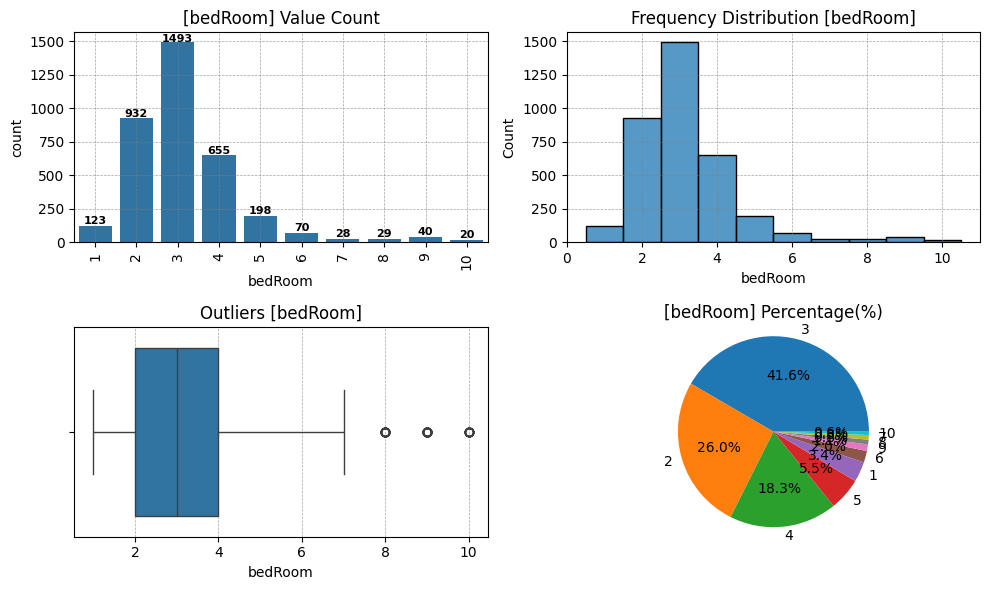

In [225]:
## Filtering Data Frame where bedRoom <= 10
df = df[df['bedRoom'] <= 10]
print(df.shape)

## After Applying Filter
df_uni = UnivariateAnalysis(df)
a,b = df_uni.NumericalFeatureAnalysis('bedRoom')

### [bathroom] Deep Analysis

Considered Descrete - Low Cardinality: bathroom(int64)


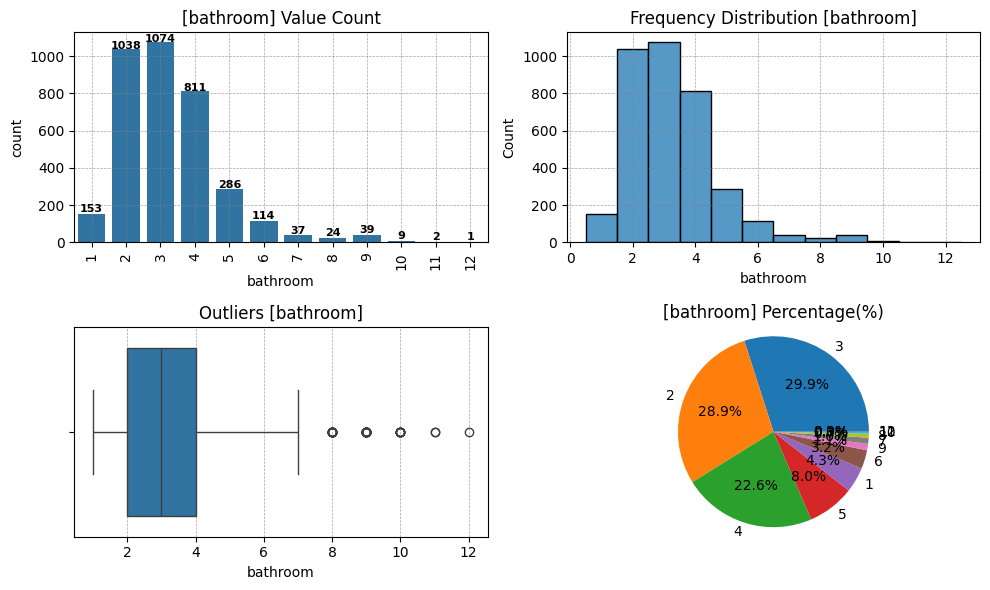

In [226]:
## Initial Data Visualization

df_uni = UnivariateAnalysis(df)
bathroom_obdervation , bathroom_outliers = df_uni.NumericalFeatureAnalysis('bathroom')

In [227]:
## Fetching Record Bathroom > 10
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1394,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,1,146
2203,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,1,38
3615,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,1,39


## [super_built_up_area] deep analysis

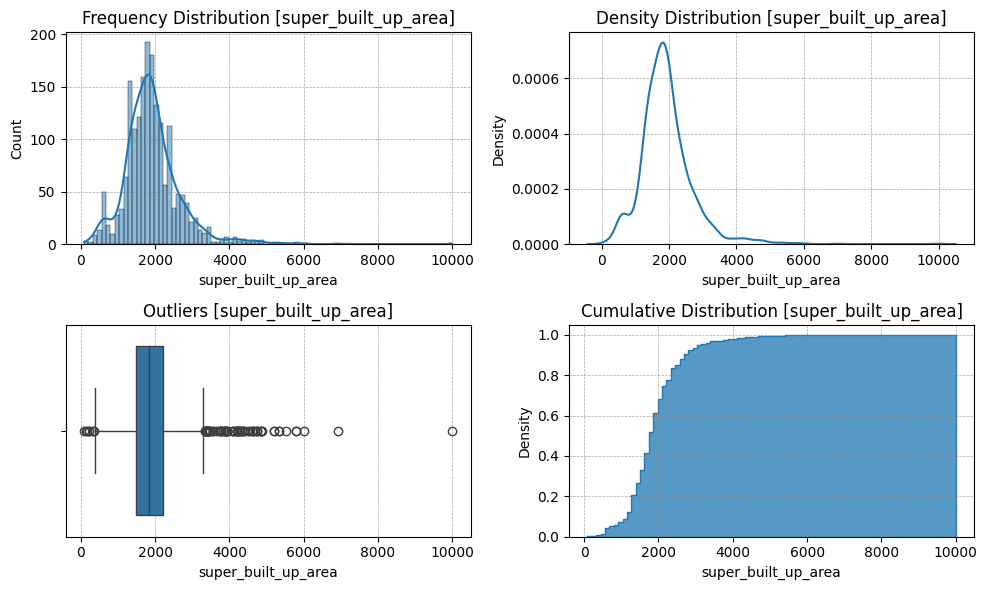

In [228]:
## Initial Data Visualization

df_uni = UnivariateAnalysis(df)
super_built_up_area_observation , super_built_up_area_outliers = df_uni.NumericalFeatureAnalysis('super_built_up_area')

In [229]:
## Fetching Records super_built_up_area > 6000
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3315,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140
3534,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,49


## [built_up_area] Deep Analysis

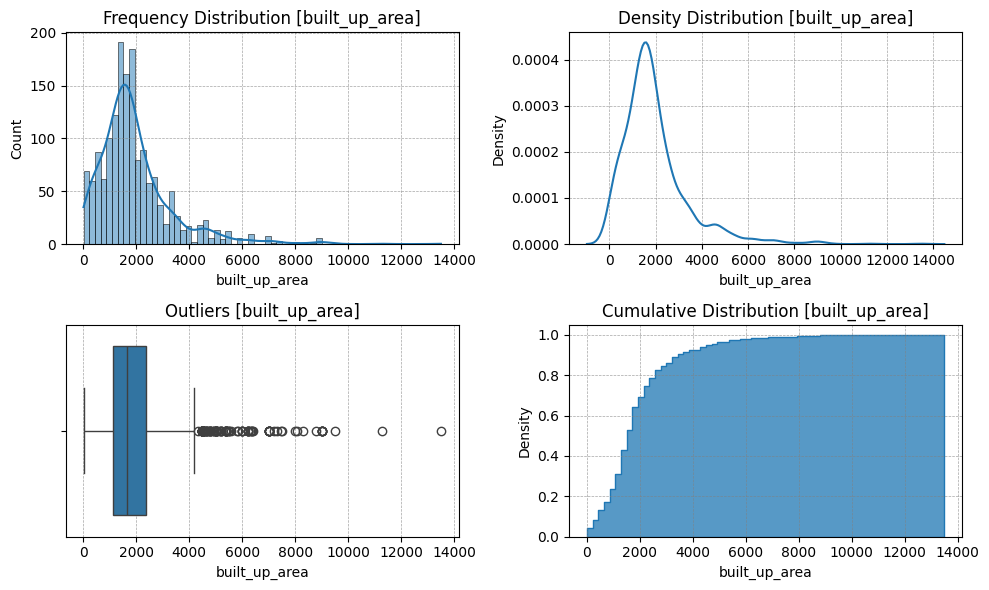

In [230]:
## Initial Data Visualization

df_uni = UnivariateAnalysis(df)
built_up_area_observation , built_up_area_outliers = df_uni.NumericalFeatureAnalysis('built_up_area')

In [231]:
## Fetching Records built_up_area > 10000

df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
601,house,independent,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3,3,1,1.0,North,Relatively New,NaN,13500.0,NaN,0,0,0,0,1,0,0
2584,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42


## [carpet_area] Deep Analysis

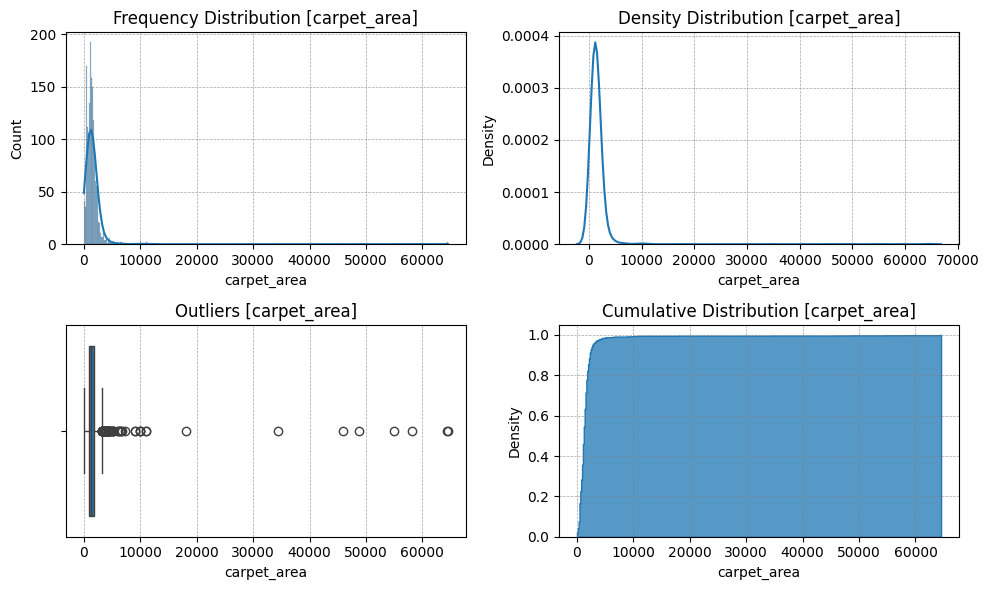

In [232]:
## Initial Data Visualization

df_uni = UnivariateAnalysis(df)
carpet_area_observation , carpet_area_outliers = df_uni.NumericalFeatureAnalysis('carpet_area')

In [233]:
## Fetchning Records carpet_area > 10000
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
644,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.0,1,0,0,0,0,0,15
650,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0,0,0,0,0,0,37
722,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,1,44
875,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1,0,0,0,0,0,37
1512,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60
1969,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
2010,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,1,60
2318,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.0,0,0,0,0,0,0,51
2817,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0,0,0,0,1,0,33
2877,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,13.0,North,Relatively New,NaN,NaN,34401.0,0,0,0,0,0,0,68


In [234]:
df.loc[2131,'carpet_area'] = 1812
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
644,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.0,1,0,0,0,0,0,15
650,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0,0,0,0,0,0,37
722,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,1,44
875,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1,0,0,0,0,0,37
1512,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60
1969,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
2010,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,1,60
2318,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.0,0,0,0,0,0,0,51
2817,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0,0,0,0,1,0,33
2877,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,13.0,North,Relatively New,NaN,NaN,34401.0,0,0,0,0,0,0,68


## [luxury_score] Deep Analysis

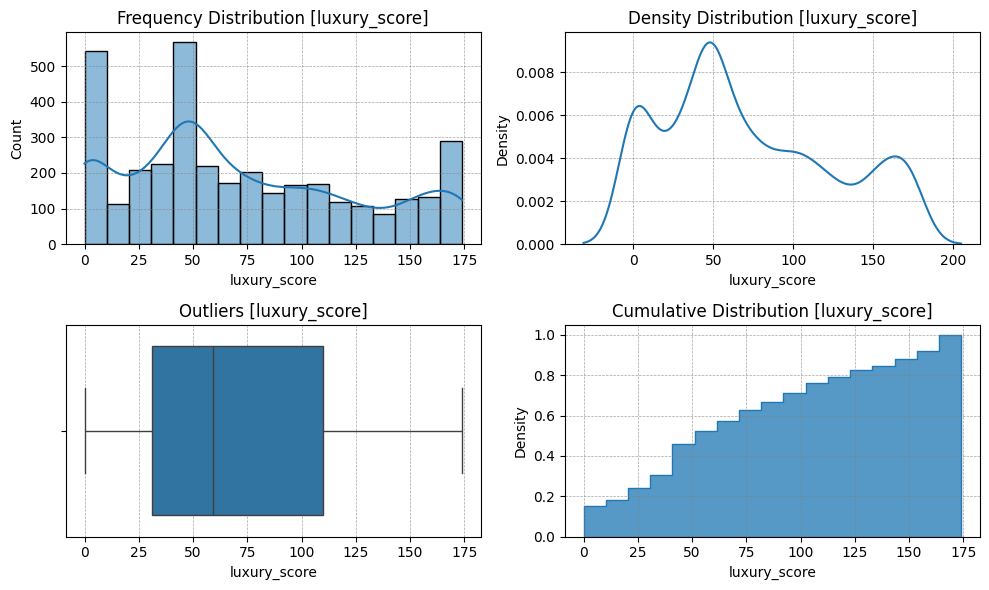

In [235]:
## Initial Data Visualization

df_uni = UnivariateAnalysis(df)
luxury_score_observation , luxury_score_outliers = df_uni.NumericalFeatureAnalysis('luxury_score')

In [236]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,m3m woodshire,sector 107,0.80,5856.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,7.0,North-East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,1,165
1,flat,not applicable,sector 4,0.42,5600.0,750.0,Carpet area: 750 (69.68 sq.m.),2,2,1,3.0,NaN,Relatively New,NaN,NaN,750.0,0,0,0,0,0,1,26
3,flat,kashish manor one,sector 111,1.65,7097.0,2325.0,Super Built up area 2325(216 sq.m.),3,4,3+,14.0,NaN,Under Construction,2325.0,NaN,NaN,0,1,0,0,1,0,8
4,house,independent,sector 3,0.90,10000.0,900.0,Plot area 900(83.61 sq.m.)Built Up area: 3500 ...,3,4,3,3.0,NaN,Moderately Old,NaN,3500.0,NaN,0,0,0,0,1,1,42
5,flat,ss the leaf,sector 85,1.10,6318.0,1741.0,Super Built up area 1741(161.74 sq.m.)Carpet a...,2,2,3+,3.0,South-East,Relatively New,1741.0,NaN,1218.0,0,0,1,0,0,0,143


In [237]:
## Recalculating price_per_sqft to avoid any protential data error after Making few updates 

df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

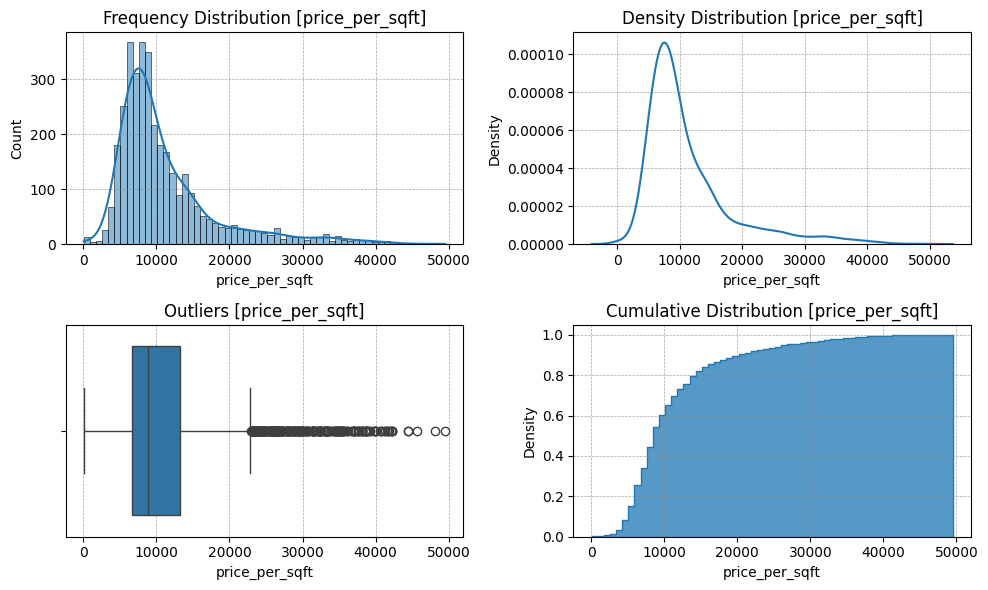

In [238]:
## Checking for any potential outliers

df_uni = UnivariateAnalysis(df)
a,b = df_uni.NumericalFeatureAnalysis('price_per_sqft')

In [239]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
471,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,1,60
1082,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,1,88
2143,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0
2588,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,1,103
2900,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,1,121
3202,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,1,7
3381,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,2,0
3480,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,1,44
3798,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97


In [240]:
## Caluculate Room Ratio 5 percentile
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

np.float64(254.86666666666673)

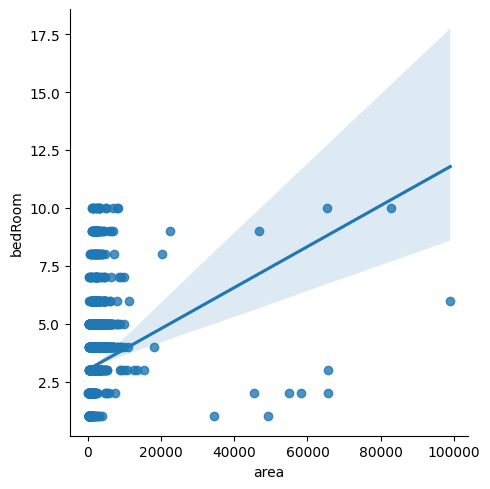

In [241]:
sns.lmplot(data=df, x='area', y='bedRoom')

In [242]:
## Add Column for Area Room Ratio Calculation
df['area_room_ratio'] = df['area']/df['bedRoom']

In [243]:
df[df['area_room_ratio']<250]['bedRoom'].value_counts()

bedRoom
2     47
3     33
5     28
4     17
6     17
9     15
8     11
7      8
10     7
Name: count, dtype: int64

In [244]:
## Filter data frame for area_room_ratio > 100 (Basically Drop all records where area_room_ratio < 100)
df = df[df['area_room_ratio'] > 100]

In [245]:
## Investigation Any Annomoly 
## More than 3 bed rooms where ratio < 250 are observed

outliers_df = df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 3)]
outliers_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
22,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9,9,3+,3.0,East,Relatively New,NaN,165.0,164.0,0,0,0,1,1,1,41,166.000000
73,house,sector 57 huda,sector 57,3.80,26063.0,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8,8,3+,4.0,East,Relatively New,NaN,162.0,160.0,0,0,1,1,0,1,94,182.250000
189,house,independent,sector 4,0.80,11852.0,675.0,Plot area 75(62.71 sq.m.),5,3,1,2.0,NaN,Moderately Old,NaN,675.0,NaN,0,0,0,0,0,0,0,135.000000
216,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5,4,2,1.0,East,Undefined,NaN,1100.0,900.0,0,0,0,0,0,0,0,220.000000
219,house,independent,sector 104,0.60,5128.0,1170.0,Plot area 130(108.7 sq.m.),7,3,1,2.0,North,Moderately Old,NaN,1170.0,NaN,0,0,0,0,0,0,0,167.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507,house,independent,sector 28,0.70,8102.0,864.0,Plot area 864(80.27 sq.m.),4,2,0,2.0,North,Old Property,NaN,864.0,NaN,0,0,0,0,0,0,7,216.000000
3674,house,independent,sector 4,1.10,6111.0,1800.0,Plot area 200(167.23 sq.m.),8,4,3+,2.0,West,Old Property,NaN,1800.0,NaN,0,0,0,0,0,0,7,225.000000
3691,house,independent,sector 55,1.45,26852.0,540.0,Plot area 60(5.57 sq.m.),4,4,3+,4.0,East,Relatively New,NaN,60.0,NaN,0,0,1,0,0,0,70,135.000000
3713,house,palam vihar extension west zone rwa,sector 2,0.40,4444.0,900.0,Plot area 900(83.61 sq.m.),6,4,2,2.0,West,Moderately Old,NaN,900.0,NaN,0,0,0,0,0,0,36,150.000000


In [246]:
## For Records that has more than 3 bedroom is dividev by the FloorNum
outliers_df['bedRoom'] = round(outliers_df['bedRoom'] / outliers_df['floorNum'])

In [247]:
df.update(outliers_df)

In [248]:
df.shape

(3569, 24)

In [249]:
## Recalulating area_room_ratio after df update
df['area_room_ratio'] = df['area']/df['bedRoom']

## Reinvestigating for bed room > 4
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
216,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5,4,2,1.0,East,Undefined,NaN,1100.0,900.0,0,0,0,0,0,0,0,220.000000
378,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,1,0,225.000000
627,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,150.000000
637,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5,2,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,0,29,120.600000
949,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0,225.000000
1171,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,0,0,113.000000
1214,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,0,8,200.000000
1431,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,0,0,198.000000
1601,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000000
1647,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8,8,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,0,0,222.750000


In [250]:
## Dropping Records where bedroom > 4 
df = df[~((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))]

In [251]:
df.shape

(3556, 24)

In [252]:
df.to_csv(f"{file_path}/7.gurgaon_properties_outlier_treated.csv",index=False)

In [253]:
# import dtale
# d = dtale.show(df)
# d.open_browser()

